In [63]:
# Importing all the necessaries libraries
import os
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import scipy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import statistics as st
import statsmodels.api  as sm
from sklearn import svm

In [64]:
# This is the function definition of the Exo-SIR Model that we designed
# beta_x and i_x 
def Exo_SIR_model(y, t, beta_x, beta_e, gamma):
    s, i_x, i_e, r = y
    
    i = i_x+i_e
    ds__dt = -beta_x*s-beta_e*s*i
    dix__dt = beta_x*s-gamma*i_x
    die__dt = beta_e*s*i-gamma*i_e
    dr__dt = gamma*i
    
    return([ds__dt, dix__dt, die__dt, dr__dt])

In [65]:
# This is the time series data which we're going to work on 
data1 = pd.read_csv('/content/Rajasthan_time_series.csv')
data1

,Date,DC,Recovered,Deceased,DR,TC,TR,Imported
0,March14,3,1,0,1,3,1,1.0
1,March15,1,2,0,2,4,3,0.0
2,March16,0,0,0,0,4,3,0.0
3,March17,0,0,0,0,4,3,0.0
4,March18,3,0,0,0,7,3,3.0
5,March19,2,0,0,0,9,3,2.0
6,March20,8,0,0,0,17,3,0.0
7,March21,7,0,0,0,24,3,0.0
8,March22,4,0,0,0,28,3,2.0
9,March23,4,0,0,0,32,3,0.0


In [66]:
# Renaming the columns

data1.columns = ['Date','DC','Rec','Death','DR','TC','TR','Imp_DC']
data1.head()

,Date,DC,Rec,Death,DR,TC,TR,Imp_DC
0,March14,3,1,0,1,3,1,1.0
1,March15,1,2,0,2,4,3,0.0
2,March16,0,0,0,0,4,3,0.0
3,March17,0,0,0,0,4,3,0.0
4,March18,3,0,0,0,7,3,3.0


In [67]:
data1

,Date,DC,Rec,Death,DR,TC,TR,Imp_DC
0,March14,3,1,0,1,3,1,1.0
1,March15,1,2,0,2,4,3,0.0
2,March16,0,0,0,0,4,3,0.0
3,March17,0,0,0,0,4,3,0.0
4,March18,3,0,0,0,7,3,3.0
5,March19,2,0,0,0,9,3,2.0
6,March20,8,0,0,0,17,3,0.0
7,March21,7,0,0,0,24,3,0.0
8,March22,4,0,0,0,28,3,2.0
9,March23,4,0,0,0,32,3,0.0


In [68]:
data1.loc[5:33,'Imp_DC']=0

In [69]:
data1

,Date,DC,Rec,Death,DR,TC,TR,Imp_DC
0,March14,3,1,0,1,3,1,1.0
1,March15,1,2,0,2,4,3,0.0
2,March16,0,0,0,0,4,3,0.0
3,March17,0,0,0,0,4,3,0.0
4,March18,3,0,0,0,7,3,3.0
5,March19,2,0,0,0,9,3,0.0
6,March20,8,0,0,0,17,3,0.0
7,March21,7,0,0,0,24,3,0.0
8,March22,4,0,0,0,28,3,0.0
9,March23,4,0,0,0,32,3,0.0


In [70]:
# Computing the cumulative Imported infections an adding it as a column to the dataset
cum_imp_cases = [data1.loc[0,'Imp_DC']]
for it in range(1,len(data1)):
    cum_imp_cases.append(cum_imp_cases[it-1]+data1.Imp_DC[it])

data1['Imp_TC'] = cum_imp_cases
data1

,Date,DC,Rec,Death,DR,TC,TR,Imp_DC,Imp_TC
0,March14,3,1,0,1,3,1,1.0,1.0
1,March15,1,2,0,2,4,3,0.0,1.0
2,March16,0,0,0,0,4,3,0.0,1.0
3,March17,0,0,0,0,4,3,0.0,1.0
4,March18,3,0,0,0,7,3,3.0,4.0
5,March19,2,0,0,0,9,3,0.0,4.0
6,March20,8,0,0,0,17,3,0.0,4.0
7,March21,7,0,0,0,24,3,0.0,4.0
8,March22,4,0,0,0,28,3,0.0,4.0
9,March23,4,0,0,0,32,3,0.0,4.0


In [71]:
# Calculating daywise S(susceptible number) adding it to the dataset

N = 77264000 # 7.72 Crores

Sus = N - data1.TC - data1.TR
data1['S'] = Sus
data1.head()

,Date,DC,Rec,Death,DR,TC,TR,Imp_DC,Imp_TC,S
0,March14,3,1,0,1,3,1,1.0,1.0,77263996
1,March15,1,2,0,2,4,3,0.0,1.0,77263993
2,March16,0,0,0,0,4,3,0.0,1.0,77263993
3,March17,0,0,0,0,4,3,0.0,1.0,77263993
4,March18,3,0,0,0,7,3,3.0,4.0,77263990


In [72]:
# Adding fraction of susceptible number(s=S/N) column to the data set

sus = data1.S/N
data1['s'] = sus
data1.head()

,Date,DC,Rec,Death,DR,TC,TR,Imp_DC,Imp_TC,S,s
0,March14,3,1,0,1,3,1,1.0,1.0,77263996,1.0
1,March15,1,2,0,2,4,3,0.0,1.0,77263993,1.0
2,March16,0,0,0,0,4,3,0.0,1.0,77263993,1.0
3,March17,0,0,0,0,4,3,0.0,1.0,77263993,1.0
4,March18,3,0,0,0,7,3,3.0,4.0,77263990,1.0


In [73]:
# Subsetting the datframe to contain the range of dates required for analysis
data = data1[0:17]
data

,Date,DC,Rec,Death,DR,TC,TR,Imp_DC,Imp_TC,S,s
0,March14,3,1,0,1,3,1,1.0,1.0,77263996,1.000000
1,March15,1,2,0,2,4,3,0.0,1.0,77263993,1.000000
2,March16,0,0,0,0,4,3,0.0,1.0,77263993,1.000000
3,March17,0,0,0,0,4,3,0.0,1.0,77263993,1.000000
4,March18,3,0,0,0,7,3,3.0,4.0,77263990,1.000000
5,March19,2,0,0,0,9,3,0.0,4.0,77263988,1.000000
6,March20,8,0,0,0,17,3,0.0,4.0,77263980,1.000000
7,March21,7,0,0,0,24,3,0.0,4.0,77263973,1.000000
8,March22,4,0,0,0,28,3,0.0,4.0,77263969,1.000000
9,March23,4,0,0,0,32,3,0.0,4.0,77263965,1.000000


In [74]:
# Finding the fraction of infections on day to the sum of infections on all days under study

daywise_fractions = []
for inf in data.DC:
    daywise_fractions.append(inf/sum(data.DC))
daywise_fractions

[0.0379746835443038,
 0.012658227848101266,
 0.0,
 0.0,
 0.0379746835443038,
 0.02531645569620253,
 0.10126582278481013,
 0.08860759493670886,
 0.05063291139240506,
 0.05063291139240506,
 0.0,
 0.0759493670886076,
 0.02531645569620253,
 0.12658227848101267,
 0.05063291139240506,
 0.06329113924050633,
 0.25316455696202533]

In [75]:
# Finding the probable day-wise distribution of total number of infections due to Tablighi Jamaat, using the fractions computed earlier 
# Assumption made is that number of infections due to the Tablighi event, are also distributed in the same trend and are contained
# in the number of daily infections already present in the dataset

I_X_Raj = 43
daywise_cases = []
for i in daywise_fractions:
    daywise_cases.append(I_X_Raj*i)
daywise_cases

[1.6329113924050633,
 0.5443037974683544,
 0.0,
 0.0,
 1.6329113924050633,
 1.0886075949367089,
 4.3544303797468356,
 3.810126582278481,
 2.1772151898734178,
 2.1772151898734178,
 0.0,
 3.2658227848101267,
 1.0886075949367089,
 5.443037974683545,
 2.1772151898734178,
 2.7215189873417724,
 10.88607594936709]

In [76]:
# The variable daywise_cases stores the distribution of infections caused due to Tablighi event in a daywise manner
# Checking if their sum is accurately adding up to the number contained in I_X_Raj and if that is lesser than total number 
# of infections contained in the dataset till the date of study

print(sum(daywise_cases))
print(sum(data.DC))

43.0
79


In [77]:
# Adding the daily distribution of infections due to the Tablighi Jamaat which was just found, as a column to the dataframe

data['TB_DC'] = daywise_cases
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,DC,Rec,Death,DR,TC,TR,Imp_DC,Imp_TC,S,s,TB_DC
0,March14,3,1,0,1,3,1,1.0,1.0,77263996,1.0,1.632911
1,March15,1,2,0,2,4,3,0.0,1.0,77263993,1.0,0.544304
2,March16,0,0,0,0,4,3,0.0,1.0,77263993,1.0,0.000000
3,March17,0,0,0,0,4,3,0.0,1.0,77263993,1.0,0.000000
4,March18,3,0,0,0,7,3,3.0,4.0,77263990,1.0,1.632911


In [78]:
# Computing the cumulative values of infections due to Tablighi Jamaat using the daily distribution that was just created

cum_tb_cases = [data.loc[0,'TB_DC']]
for it in range(1,17):
    cum_tb_cases.append(cum_tb_cases[it-1]+data.TB_DC[it])
cum_tb_cases

[1.6329113924050633,
 2.1772151898734178,
 2.1772151898734178,
 2.1772151898734178,
 3.810126582278481,
 4.898734177215189,
 9.253164556962025,
 13.063291139240505,
 15.240506329113924,
 17.417721518987342,
 17.417721518987342,
 20.68354430379747,
 21.772151898734176,
 27.21518987341772,
 29.39240506329114,
 32.11392405063291,
 43.0]

In [79]:
# Adding the cumulative infections as a column to the dataset

data['TB_TC'] = cum_tb_cases
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,DC,Rec,Death,DR,TC,TR,Imp_DC,Imp_TC,S,s,TB_DC,TB_TC
0,March14,3,1,0,1,3,1,1.0,1.0,77263996,1.0,1.632911,1.632911
1,March15,1,2,0,2,4,3,0.0,1.0,77263993,1.0,0.544304,2.177215
2,March16,0,0,0,0,4,3,0.0,1.0,77263993,1.0,0.000000,2.177215
3,March17,0,0,0,0,4,3,0.0,1.0,77263993,1.0,0.000000,2.177215
4,March18,3,0,0,0,7,3,3.0,4.0,77263990,1.0,1.632911,3.810127


In [80]:
# Adding I_X (number of exogenous infections), I_E(number of endogenous infections), i_x(fraction of I_X), i_e(fraction of I_E) 
# as columns to the dataset
# All the values being calculated are cumulative
# I_X = Imported infections + infections due to Tablighi Jamaat
# Total infections = I_X + I_E

I_X = data.Imp_TC + data.TB_TC
data['I_X'] = I_X
I_E = data.TC - data.I_X
data['I_E'] = I_E

i_x = I_X/N
i_e = I_E/N
data['i_x'] = i_x
data['i_e'] = i_e

data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,Date,DC,Rec,Death,DR,TC,TR,Imp_DC,Imp_TC,S,s,TB_DC,TB_TC,I_X,I_E,i_x,i_e
0,March14,3,1,0,1,3,1,1.0,1.0,77263996,1.000000,1.632911,1.632911,2.632911,0.367089,3.407682e-08,4.751095e-09
1,March15,1,2,0,2,4,3,0.0,1.0,77263993,1.000000,0.544304,2.177215,3.177215,0.822785,4.112155e-08,1.064901e-08
2,March16,0,0,0,0,4,3,0.0,1.0,77263993,1.000000,0.000000,2.177215,3.177215,0.822785,4.112155e-08,1.064901e-08
3,March17,0,0,0,0,4,3,0.0,1.0,77263993,1.000000,0.000000,2.177215,3.177215,0.822785,4.112155e-08,1.064901e-08
4,March18,3,0,0,0,7,3,3.0,4.0,77263990,1.000000,1.632911,3.810127,7.810127,-0.810127,1.010836e-07,-1.048518e-08
5,March19,2,0,0,0,9,3,0.0,4.0,77263988,1.000000,1.088608,4.898734,8.898734,0.101266,1.151731e-07,1.310647e-09
6,March20,8,0,0,0,17,3,0.0,4.0,77263980,1.000000,4.354430,9.253165,13.253165,3.746835,1.715309e-07,4.849394e-08
7,March21,7,0,0,0,24,3,0.0,4.0,77263973,1.000000,3.810127,13.063291,17.063291,6.936709,2.208440e-07,8.977931e-08
8,March22,4,0,0,0,28,3,0.0,4.0,77263969,1.000000,2.177215,15.240506,19.240506,8.759494,2.490229e-07,1.133710e-07
9,March23,4,0,0,0,32,3,0.0,4.0,77263965,1.000000,2.177215,17.417722,21.417722,10.582278,2.772018e-07,1.369626e-07


In [81]:
# Adding i(fraction of cumulative infections), r(fraction of cumulative recoveries), di/dt(fraction of difference in cumulative infections i.e daily infections) 
# and dr/dt(similarly...fraction of daily recoveries) columns to the dataset
# as Number of cumulative values on nth day - Number of cumulative values on (n-1)th day = Number of new daily values on nth day


i = data.TC/N
data['i'] = i
r = data.TR/N
data['r'] = r

di_dt = data.DC/N
data['di_dt'] = di_dt
dr_dt = data.DR/N
data['dr_dt'] = dr_dt

data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,Date,DC,Rec,Death,DR,TC,TR,Imp_DC,Imp_TC,S,...,TB_DC,TB_TC,I_X,I_E,i_x,i_e,i,r,di_dt,dr_dt
0,March14,3,1,0,1,3,1,1.0,1.0,77263996,...,1.632911,1.632911,2.632911,0.367089,3.407682e-08,4.751095e-09,3.882791e-08,1.294264e-08,3.882791e-08,1.294264e-08
1,March15,1,2,0,2,4,3,0.0,1.0,77263993,...,0.544304,2.177215,3.177215,0.822785,4.112155e-08,1.064901e-08,5.177055e-08,3.882791e-08,1.294264e-08,2.588528e-08
2,March16,0,0,0,0,4,3,0.0,1.0,77263993,...,0.000000,2.177215,3.177215,0.822785,4.112155e-08,1.064901e-08,5.177055e-08,3.882791e-08,0.000000e+00,0.000000e+00
3,March17,0,0,0,0,4,3,0.0,1.0,77263993,...,0.000000,2.177215,3.177215,0.822785,4.112155e-08,1.064901e-08,5.177055e-08,3.882791e-08,0.000000e+00,0.000000e+00
4,March18,3,0,0,0,7,3,3.0,4.0,77263990,...,1.632911,3.810127,7.810127,-0.810127,1.010836e-07,-1.048518e-08,9.059847e-08,3.882791e-08,3.882791e-08,0.000000e+00


In [82]:
# Adding the dix/dt(fraction of daily exogenous infections) and die/dt(fraction of daily endogenous infections) columns to the dataset

dix_dt = [0]
die_dt = [0]

for i in range(1,17):
    temp1 = data.i_x[i]-data.i_x[i-1]
    temp2 = data.i_e[i]-data.i_e[i-1]
    
    if temp1>0:
        dix_dt.append(temp1)
    else:
        dix_dt.append(-1*temp1)
        
    if temp2>0:
        die_dt.append(temp2)
    else:
        die_dt.append(-1*temp2)
        
print(len(dix_dt))
print(len(die_dt))

data['dix_dt'] = dix_dt
data['die_dt'] = die_dt
data.head()

17
17


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Date,DC,Rec,Death,DR,TC,TR,Imp_DC,Imp_TC,S,...,I_X,I_E,i_x,i_e,i,r,di_dt,dr_dt,dix_dt,die_dt
0,March14,3,1,0,1,3,1,1.0,1.0,77263996,...,2.632911,0.367089,3.407682e-08,4.751095e-09,3.882791e-08,1.294264e-08,3.882791e-08,1.294264e-08,0.000000e+00,0.000000e+00
1,March15,1,2,0,2,4,3,0.0,1.0,77263993,...,3.177215,0.822785,4.112155e-08,1.064901e-08,5.177055e-08,3.882791e-08,1.294264e-08,2.588528e-08,7.044727e-09,5.897911e-09
2,March16,0,0,0,0,4,3,0.0,1.0,77263993,...,3.177215,0.822785,4.112155e-08,1.064901e-08,5.177055e-08,3.882791e-08,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00
3,March17,0,0,0,0,4,3,0.0,1.0,77263993,...,3.177215,0.822785,4.112155e-08,1.064901e-08,5.177055e-08,3.882791e-08,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00
4,March18,3,0,0,0,7,3,3.0,4.0,77263990,...,7.810127,-0.810127,1.010836e-07,-1.048518e-08,9.059847e-08,3.882791e-08,3.882791e-08,0.000000e+00,5.996210e-08,2.113418e-08


In [83]:
df1 = data
df1

,Date,DC,Rec,Death,DR,TC,TR,Imp_DC,Imp_TC,S,...,I_X,I_E,i_x,i_e,i,r,di_dt,dr_dt,dix_dt,die_dt
0,March14,3,1,0,1,3,1,1.0,1.0,77263996,...,2.632911,0.367089,3.407682e-08,4.751095e-09,3.882791e-08,1.294264e-08,3.882791e-08,1.294264e-08,0.000000e+00,0.000000e+00
1,March15,1,2,0,2,4,3,0.0,1.0,77263993,...,3.177215,0.822785,4.112155e-08,1.064901e-08,5.177055e-08,3.882791e-08,1.294264e-08,2.588528e-08,7.044727e-09,5.897911e-09
2,March16,0,0,0,0,4,3,0.0,1.0,77263993,...,3.177215,0.822785,4.112155e-08,1.064901e-08,5.177055e-08,3.882791e-08,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00
3,March17,0,0,0,0,4,3,0.0,1.0,77263993,...,3.177215,0.822785,4.112155e-08,1.064901e-08,5.177055e-08,3.882791e-08,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00
4,March18,3,0,0,0,7,3,3.0,4.0,77263990,...,7.810127,-0.810127,1.010836e-07,-1.048518e-08,9.059847e-08,3.882791e-08,3.882791e-08,0.000000e+00,5.996210e-08,2.113418e-08
5,March19,2,0,0,0,9,3,0.0,4.0,77263988,...,8.898734,0.101266,1.151731e-07,1.310647e-09,1.164837e-07,3.882791e-08,2.588528e-08,0.000000e+00,1.408945e-08,1.179582e-08
6,March20,8,0,0,0,17,3,0.0,4.0,77263980,...,13.253165,3.746835,1.715309e-07,4.849394e-08,2.200248e-07,3.882791e-08,1.035411e-07,0.000000e+00,5.635782e-08,4.718329e-08
7,March21,7,0,0,0,24,3,0.0,4.0,77263973,...,17.063291,6.936709,2.208440e-07,8.977931e-08,3.106233e-07,3.882791e-08,9.059847e-08,0.000000e+00,4.931309e-08,4.128538e-08
8,March22,4,0,0,0,28,3,0.0,4.0,77263969,...,19.240506,8.759494,2.490229e-07,1.133710e-07,3.623939e-07,3.882791e-08,5.177055e-08,0.000000e+00,2.817891e-08,2.359164e-08
9,March23,4,0,0,0,32,3,0.0,4.0,77263965,...,21.417722,10.582278,2.772018e-07,1.369626e-07,4.141644e-07,3.882791e-08,5.177055e-08,0.000000e+00,2.817891e-08,2.359164e-08


In [84]:
# Calculating day-wise Gamma for the set of days

Gamma = df1.dr_dt / df1.i
print('daywise gamma for Rajasthan\n')
Gamma

daywise gamma for Rajasthan



0     0.333333
1     0.500000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
dtype: float64

In [85]:
# Calculating day-wise Beta_x for the set of days

Beta_x = (df1.dix_dt+Gamma*df1.i_x) / df1.s
print('daywise beta_x for Rajasthan')
Beta_x

daywise beta_x for Rajasthan


0     1.135894e-08
1     2.760550e-08
2     0.000000e+00
3     0.000000e+00
4     5.996210e-08
5     1.408946e-08
6     5.635783e-08
7     4.931311e-08
8     2.817892e-08
9     2.817892e-08
10    0.000000e+00
11    4.226839e-08
12    1.408946e-08
13    7.044732e-08
14    2.817893e-08
15    3.522366e-08
16    1.408947e-07
dtype: float64

In [86]:
# Calculating day-wise Beta_e for the set of days

Beta_e = (df1.die_dt+Gamma*df1.i_e)/(df1.s*df1.i)    
print('daywise beta_e for Rajasthan')
Beta_e

daywise beta_e for Rajasthan


0     0.040788
1     0.216772
2     0.000000
3     0.000000
4     0.233273
5     0.101266
6     0.214445
7     0.132911
8     0.065099
9     0.056962
10    0.000000
11    0.071952
12    0.022785
13    0.091139
14    0.033755
15    0.038618
16    0.115366
dtype: float64

In [87]:
# Calculating mean of Beta_x, Beta_e and Gamma for Rajasthan
 
beta_x_mean = st.mean(Beta_x)
beta_e_mean = st.mean(Beta_e)
gamma_mean = st.mean(Gamma)
print("the mean of Beta_x for Rajasthan \n",beta_x_mean)
print("the mean of Beta_e for Rajasthan \n",beta_e_mean)
print("the mean of Gamma for Rajasthan using actual cases\n",gamma_mean)

the mean of Beta_x for Rajasthan 
 3.565571978968284e-08
the mean of Beta_e for Rajasthan 
 0.08441959531856459
the mean of Gamma for Rajasthan using actual cases
 0.049019607843137254


# Plotting the predictions

In [88]:
# Solving the ODEs using Scipy
# Assigning initial values of infections, recoveries & susceptibles along with the three parameters beta_x, beta_e and gamma
# all which are input to the Exo_SIR funtion

S0 = df1.loc[16,'s']
IX0 = df1.loc[16,'i_x']
IE0 = df1.loc[16,'i_e']
R0 = df1.loc[16,'r']
beta_x = beta_x_mean
beta_e = beta_e_mean
gamma = gamma_mean

# time vector
t = np.linspace(0, 500, 500)


# Result
solution1 = scipy.integrate.odeint(Exo_SIR_model,[S0, IX0, IE0, R0], t, args=(beta_x, beta_e, gamma))
solution1 = np.array(solution1)
print(S0)
print(IX0)
print(IE0)
print(R0)

0.9999989387036654
6.083039966866846e-07
4.141644232760406e-07
3.88279146821288e-08


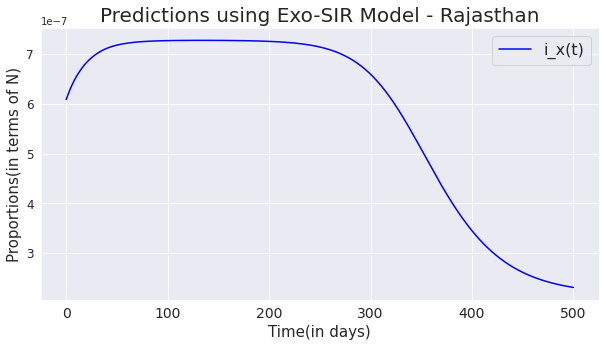

In [89]:
# Plotting the result

plt.figure(figsize = (10,5))
#plt.plot(t, solution1[:,0], label = 's(t)', c='red')
plt.plot(t, solution1[:,1], label = 'i_x(t)', c = 'blue')
#plt.plot(t, solution1[:,2], label = 'i_e(t)', c ='orange')
#plt.plot(t, solution1[:,3], label = 'r(t)', c='green')

plt.legend(prop={'size': 16})
plt.title("Predictions using Exo-SIR Model - Rajasthan", size=20)
plt.xlabel("Time(in days)", size=15)
plt.ylabel("Proportions(in terms of N)", size=15)
plt.xticks(size=14)
plt.yticks(size=12)
plt.savefig('E:\\Docs & Files\\SMA\\4. Exo-SIR Model\\pred_Exo-SIR_Raj_with_i_x.png')
plt.show()